# Overview

The objective of this notebook is to build a dataframe that contains all the geometry infor for VULCANX banks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# setup plot config via seaborn
sns.set_theme(style="whitegrid", )
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize":(12,12),
    "agg.path.chunksize": 1000000,
}
sns.set_theme(style="ticks", palette="colorblind", rc=custom_params)

## Bank1&2 (2021)

### bank1

In [2]:
df_bank1 = pd.read_csv("SNS/VULCAN/VULCANX_Detector_Asbuilt_Right Bank_20210219.csv")
df_bank1["bank"] = 1

df_bank1["eightpack"] = df_bank1["Point"].apply(lambda x: int(x.split("T")[0].replace("D", "")))

# define the four corners of each 8-pack, we wil ignore the tubes in the middle
vrtc_dict = {
    "1B": 0,
    "1T": 1,
    "4T": 2,
    "4B": 3,
}

df_bank1["eightpack vertice idx"] = df_bank1["Point"].apply(lambda x: vrtc_dict.get(x[-2:], -1))

In [3]:
df_bank1

,Point,Z,X,Y,bank,eightpack,eightpack vertice idx
0,D1T1B,0.432330,-2.253590,-0.523408,1,1,0
1,D1T1T,0.436595,-2.255283,0.521225,1,1,1
2,D1T2B,0.421499,-2.255628,-0.523392,1,1,-1
3,D1T2T,0.425765,-2.257352,0.521234,1,1,-1
4,D1T3B,0.410665,-2.257665,-0.523371,1,1,-1
...,...,...,...,...,...,...,...
155,D20T2T,-0.419817,-2.258579,0.521736,1,20,-1
156,D20T3B,-0.434508,-2.253856,-0.522790,1,20,-1
157,D20T3T,-0.430646,-2.256522,0.521799,1,20,-1
158,D20T4B,-0.445339,-2.251795,-0.522716,1,20,3


### bank2

In [4]:
df_bank2 = pd.read_csv("SNS/VULCAN/VULCANX_Detector_Asbuilt_Left Bank_20210219.csv")
df_bank2["bank"] = 2

df_bank2["eightpack"] = df_bank2["Point"].apply(lambda x: int(x.split("T")[0].replace("D", "")))

# define the four corners of each 8-pack, we wil ignore the tubes in the middle
vrtc_dict = {
    "4B": 0,
    "4T": 1,
    "1T": 2,
    "1B": 3,
}

df_bank2["eightpack vertice idx"] = df_bank2["Point"].apply(lambda x: vrtc_dict.get(x[-2:], -1))

In [5]:
df_bank2

,Point,Z,X,Y,bank,eightpack,eightpack vertice idx
0,D1T1B,0.444228,2.251163,-0.522457,2,1,3
1,D1T1T,0.440805,2.252693,0.522160,2,1,2
2,D1T2B,0.433400,2.253239,-0.522501,2,1,-1
3,D1T2T,0.429984,2.254785,0.522097,2,1,-1
4,D1T3B,0.422574,2.255314,-0.522546,2,1,-1
...,...,...,...,...,...,...,...
155,D20T2T,-0.416475,2.258141,0.522032,2,20,-1
156,D20T3B,-0.422645,2.256361,-0.522627,2,20,-1
157,D20T3T,-0.427301,2.256067,0.521997,2,20,-1
158,D20T4B,-0.433473,2.254303,-0.522625,2,20,0


In [6]:
df_2021 = pd.concat([df_bank1, df_bank2])
df_2021.reset_index(drop=True, inplace=True)

# we do not care about the measurement of middle tubes T2, T3, and will drop them from analysis
df_2021.drop(df_2021.index[df_2021["eightpack vertice idx"] < 0], inplace=True)

df_2021.drop(["Point"], axis=1, inplace=True)

In [7]:
df_2021

,Z,X,Y,bank,eightpack,eightpack vertice idx
0,0.432330,-2.253590,-0.523408,1,1,0
1,0.436595,-2.255283,0.521225,1,1,1
6,0.399831,-2.259701,-0.523349,1,1,3
7,0.404110,-2.261493,0.521241,1,1,2
8,0.388861,-2.261352,-0.523327,1,2,0
...,...,...,...,...,...,...
311,-0.393604,2.262078,0.521799,2,19,1
312,-0.400986,2.260478,-0.522632,2,20,3
313,-0.405648,2.260214,0.521983,2,20,2
318,-0.433473,2.254303,-0.522625,2,20,0


## Bank[3-5] (2022)

In [8]:
df_2022 = pd.read_csv("SNS/VULCAN/BL7_combine_B1_B2_B3_B4_B5_20220420.csv")
df_2022["bank"] = df_2022["Point"].apply(lambda x: int(x.split("_")[0].replace("B", "")))
df_2022["eightpack"] = df_2022["Point"].apply(lambda x: int(x.split("_")[1].split("T")[0].replace("D","")))

vrtc_dict = {
    "2B": 0,
    "2T": 1,
    "8T": 2,
    "8B": 3,
}
df_2022["eightpack vertice idx"] = df_2022["Point"].apply(lambda x: vrtc_dict.get(x[-2:]))
df_2022.drop(["Point"], axis=1, inplace=True)

In [9]:
df_2022.drop(df_2022.index[df_2022["bank"] ==1], inplace=True)
df_2022.drop(df_2022.index[df_2022["bank"] ==2], inplace=True)

In [10]:
df_2022

,Z,X,Y,bank,eightpack,eightpack vertice idx
32,-1.355977,1.561162,-0.521228,3,1,0
33,-1.356894,1.563059,0.523470,3,1,1
34,-1.330861,1.582710,-0.521264,3,1,3
35,-1.331794,1.584644,0.523414,3,1,2
36,-1.321889,1.590257,-0.521514,3,2,0
...,...,...,...,...,...,...
207,-1.808333,-0.891031,0.384987,5,8,2
208,-1.776641,-0.962835,-0.388057,5,9,0
209,-1.777997,-0.962503,0.384705,5,9,1
210,-1.789250,-0.932239,-0.387992,5,9,3


## Bank6 (engineering value)

In [11]:
df_bank6 = pd.read_excel("SNS/VULCAN/VULCAN-X_detector_pixel_B6_20220322.xlsx", sheet_name="Bank_6_all", usecols="B:P")

df_bank6["eightpack"] = df_bank6["8-pack #"] - 100 + 1
df_bank6["X"] = df_bank6["X(j,ins)"]/1000  # mm -> meters
df_bank6["Y"] = df_bank6["Y(j,ins)"]/1000  # mm -> meters
df_bank6["Z"] = df_bank6["Z(j,ins)"]/1000  # mm -> meters
df_bank6["L2_xz"] = df_bank6[["X", "Z"]].apply(np.linalg.norm, axis=1)

df_bank6.drop(
    [
        "8-pack #",
        "cos(angle)", "sin(angle)",
        "X(j,ins)", "Y(j,ins)", "Z(j,ins)",
        "Qx(j,ins)", "Qy(j,ins)", "Qz(j,ins)",
        "L", "2θ", "h", "DIFC"
    ], 
    axis=1,
    inplace=True,
)

df_bank6["eightpack vertice idx"] = -1

df_bank6.loc[df_bank6["pixel ID in 8-pack"]==512, "eightpack vertice idx"] = 0
df_bank6.loc[df_bank6["pixel ID in 8-pack"]==1023, "eightpack vertice idx"] = 1
df_bank6.loc[df_bank6["pixel ID in 8-pack"]==3584, "eightpack vertice idx"] = 3
df_bank6.loc[df_bank6["pixel ID in 8-pack"]==4095, "eightpack vertice idx"] = 2

df_bank6.drop(df_bank6.index[df_bank6["eightpack vertice idx"] < 0], inplace=True)

In [12]:
df_bank6.drop(
    ["ID", "pixel ID in 8-pack", "L2_xz"], 
    axis=1,
    inplace=True,
)

df_bank6

,eightpack,X,Y,Z,eightpack vertice idx
512,1,-1.805335,-0.548048,1.090303,0
1023,1,-1.805335,0.548048,1.090303,1
3584,1,-1.822208,-0.548048,1.061862,3
4095,1,-1.822208,0.548048,1.061862,2
5512,2,-1.826228,-0.548048,1.054935,0
6023,2,-1.826228,0.548048,1.054935,1
8584,2,-1.842544,-0.548048,1.026170,3
9095,2,-1.842544,0.548048,1.026170,2
10512,3,-1.846428,-0.548048,1.019166,0
11023,3,-1.846428,0.548048,1.019166,1


In [13]:
df_bank6["bank"] = 6

## Merge

In [14]:
df = pd.concat([df_2021, df_2022, df_bank6])

df.reset_index(drop=True, inplace=True)

df

,Z,X,Y,bank,eightpack,eightpack vertice idx
0,0.432330,-2.253590,-0.523408,1,1,0
1,0.436595,-2.255283,0.521225,1,1,1
2,0.399831,-2.259701,-0.523349,1,1,3
3,0.404110,-2.261493,0.521241,1,1,2
4,0.388861,-2.261352,-0.523327,1,2,0
...,...,...,...,...,...,...
379,0.727787,-1.979475,0.548048,6,10,2
380,0.720265,-1.982224,-0.548048,6,11,0
381,0.720265,-1.982224,0.548048,6,11,1
382,0.689095,-1.993274,-0.548048,6,11,3


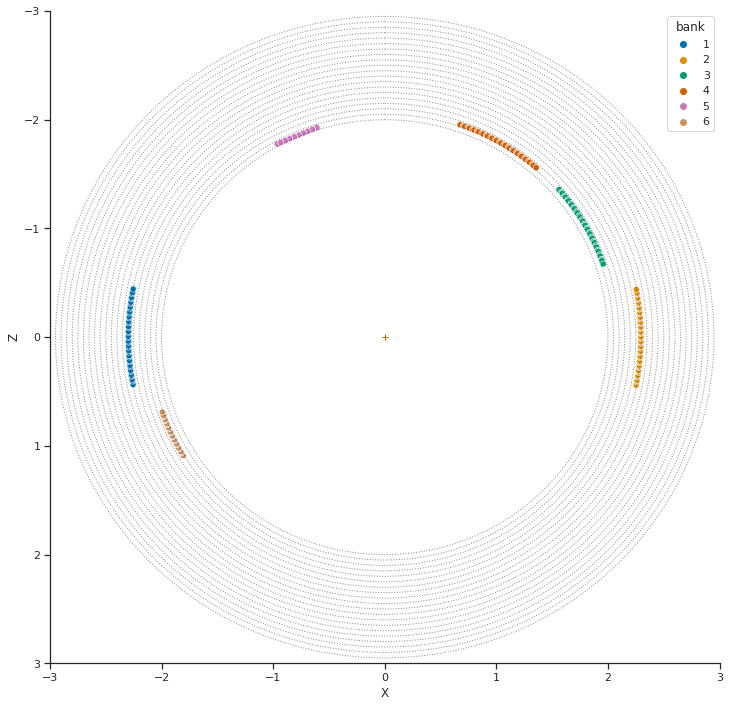

In [15]:
# incident beam is pointing down
ax = sns.scatterplot(x=df["X"], y=df["Z"], hue=df["bank"], palette="colorblind")
ax.set_ylim([3, -3])
ax.set_xlim([-3, 3])
ax.plot(0, 0, 'r+')

for r in np.arange(2, 3, 0.05):
    cir = plt.Circle(xy=(0, 0), radius=r, color='k', fill=False, linestyle=":", alpha=0.5)
    ax.add_patch(cir)

## Export to Disk

In [16]:
df.to_feather("SNS/VULCAN/Bank1-2_2021_Bank3-5_2022_Bank6-engineering.arrow", compression="lz4")

In [17]:
df.to_csv("SNS/VULCAN/Bank1-2_2021_Bank3-5_2022_Bank6-engineering.csv", index=False)